DAT405 Assignment 3

Theodor Jendle - 9901134339 - 

Carl Hjalmarsson - 9305198930 - 

In [69]:
import nbdime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import seaborn as sns

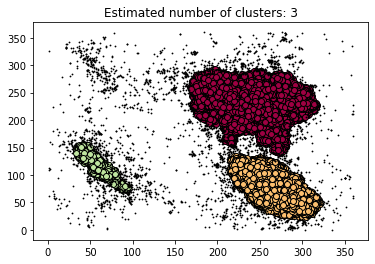

In [75]:
protein_data = pd.read_csv("assignment3-data.csv", index_col = False)
angle_data = protein_data[['phi', 'psi']]
shifted_angles = angle_data.copy(deep=True)
shifted_angles["phi"] = shifted_angles["phi"] + 350
shifted_angles["psi"] = shifted_angles["psi"] + 95
shifted_angles = shifted_angles.mod(360, axis = 1)

# paramets for DBSCAN
epsilon = 10
min_samples = 63
db = DBSCAN(eps = epsilon, min_samples=min_samples).fit(shifted_angles)

# Copied from moduel 3 materials
labels = db.labels_
core_samples_mask = np.zeros_like(labels, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# This plot was copies from moduel 3 materials
unique_labels = set(labels) 
colors = [plt.cm.Spectral(each) 
          for each in np.linspace(0, 1, len(unique_labels))] 
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        col = [0, 0, 0, 1] 
    class_member_mask = (labels == k) 
    phi_psi = shifted_angles[class_member_mask & core_samples_mask] 
    plt.plot(phi_psi["phi"], phi_psi["psi"], 'o', markerfacecolor=tuple(col), 
             markeredgecolor='k', markersize=6) 
    phi_psi = shifted_angles[class_member_mask & ~core_samples_mask] 
    plt.plot(phi_psi["phi"], phi_psi["psi"], 'o', markerfacecolor=tuple(col), 
             markeredgecolor='k', markersize=0.8) 
plt.title('Estimated number of clusters: %d' % n_clusters_) 
plt.show() 

### a)
#### 1)
Since we have approximately 30000 data points, we need high number of minimum neighbors in order to create a core. Otherwise, with a low requirement of neighbors, the number of clusters will spike. When looking at stackexchange, we got an advise to not relay on automatic methods to choose minimum requirement of neighbors, but rather to relay on domain knowledge. For our case we do not have any domain knowledge, but with trial and error we found a good requirement value of number of neighbors to be 63.

#### 2)
With trial and error we found that, when minimum neighbors was 63, for epsilon values greater than 10 the yellow and red cluster merged into one. From previous analysis we know that these two clusters should be seperated, hence we set the epsilon value to 10.

In [71]:
number_of_outliers = 0
for outliers in labels:
    if outliers == -1:
        number_of_outliers += 1

print("The number of outliers found in our case is: {}".format(number_of_outliers))


The number of outliers found in our case is: 1907
